In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os

from matplotlib import pyplot as plt

from metavision_core.event_io import RawReader

import lib

In [7]:
plt.rcParams['figure.figsize'] = [8, 6]

#### Loading the dataset

In [29]:
import numpy as np

dataset_path = "dataset/45/"

filenames = np.array(lib.load_filenames_to_matrix(dataset_path))

raws = []
for fxs in filenames:
	rawsx = [RawReader(f) for f in fxs]
	raws.append(rawsx)

distances = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 4.0, 5.0]
frequencies = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 20000, 30000]
bin_width_us = 1000

#### Get the events from raws

In [30]:
events = lib.recursive_map(lib.raw_load_events, raws, dtime=1000000, start_ts=0.1 * 1e6)

#### Process the data

In [35]:
#check if exists "avg_events.npy (precomputed) - takes a long time to compute"
avg_events_array = None

if os.path.exists("avg_events.npz"):
	avg_events_array_0, avg_events_array_45 = np.load("avg_events.npz").values()

else:
	avg_events_matrix = []

	for distance_idx, event_list in enumerate(events):
		distance_avg_events = []
		print(f"Processing distance {distances[distance_idx]} meters")
		for freq_idx, event_set in enumerate(event_list):
			frequency = frequencies[freq_idx]
			
			if len(event_set) == 0:
				print(f"  No events for frequency {frequency} Hz")
				distance_avg_events.append(np.nan)  # Use NaN for missing data
				continue
			
			#if needs to be adjusted
			prominence_value = None
			
			#event data processing
			avg_events, event_counts, signal, time_axis, peak_indices = lib.process_event_data(
				event_set,
				frequency,
				prominence_value=prominence_value
			)
			
			print(f"  Frequency: {frequency} Hz, Average Events per Period: {avg_events}")
			
			distance_avg_events.append(avg_events)
			
			# Optionally, visualize the resampled signal and detected peaks
			# plt.figure(figsize=(12, 6))
			# plt.plot(time_axis, signal)
			# plt.plot(time_axis[peak_indices], signal[peak_indices], 'rx')  # Mark peaks
			# plt.xlabel('Time (us)')
			# plt.ylabel('Summed Polarity')
			# plt.title(f'Distance {distances[distance_idx]} m, Frequency {frequency} Hz')
			# plt.show()
		
		avg_events_matrix.append(distance_avg_events)

	avg_events_array = np.array(avg_events_matrix)

### Plot the effect of distance

In [ ]:
evs = avg_events_array_0

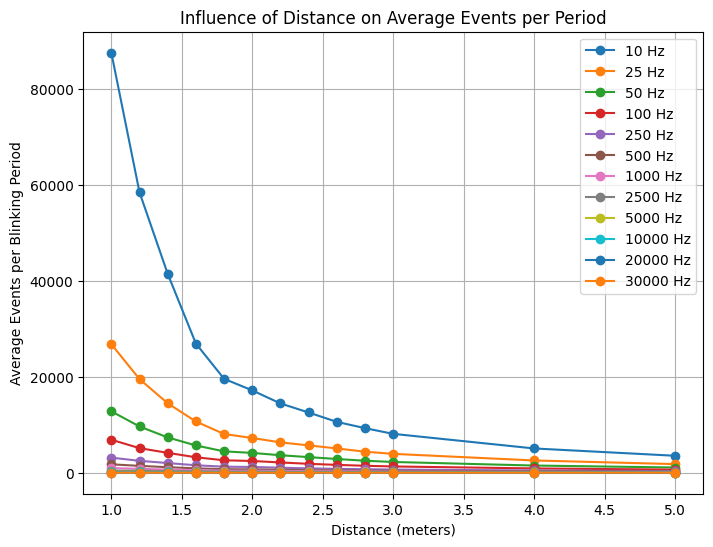

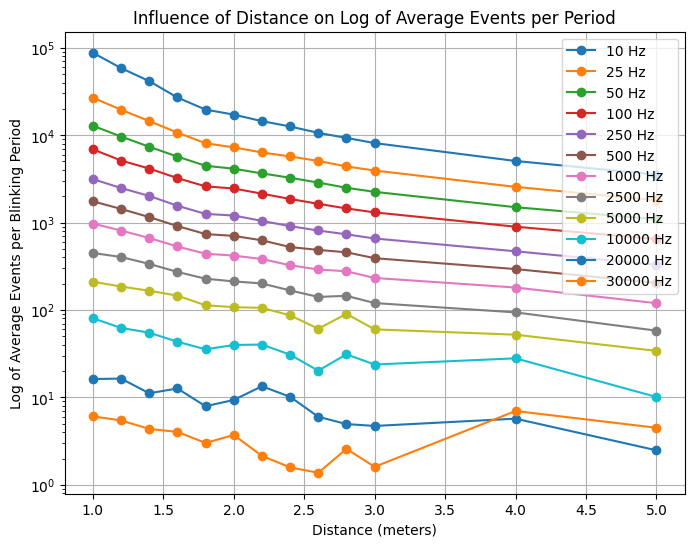

In [ ]:
lib.plot_avg_events_vs_distance(distances, evs, frequencies)
lib.plot_log_avg_events_vs_distance(distances, evs, frequencies)

### Plot the effect of frequency

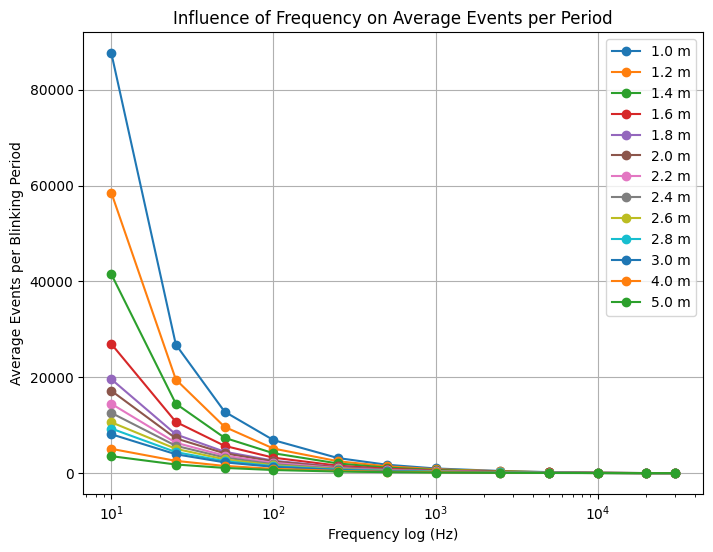

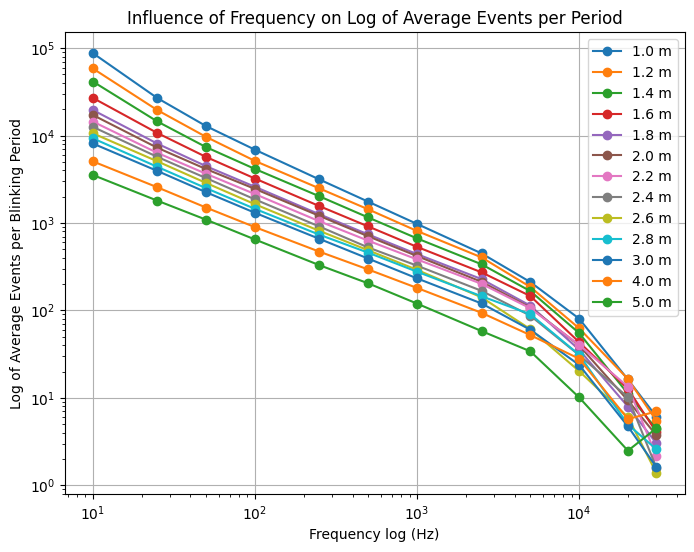

In [ ]:
lib.plot_avg_events_vs_frequency(frequencies, evs, distances)
lib.plot_log_avg_events_vs_frequency(frequencies, evs, distances)